<a href="https://colab.research.google.com/github/MBSant/Python/blob/main/Aula03_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Regressão
Variável resposta é contínua nesse caso

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###**Problema**

Para melhorar sua concessão de créditos, um banco quer prever quanto é a renda mensal, mesmo considerando que eles podem movimentar contas de outros bancos e mesmo que não declarem ou tragam comprovante.

###**Variáveis**
 * Age: idade
 * NumberOfDependents: quantidade de dependentes informados pelo cliente
 * RevolvingUtilizationOfUnsecuredLines: Total de crédito tomado sem garantia
 * DebitRation:Razão da dívida pelo patrimônio
 * NumberOfOpenCreditLinesAndLoans: Número total de empréstimos tomados
 * NumberOfTime30-59DaysPastDueNotWorse:Número de vezes que o cliente ficou entre 30 e 59 dias em atraso
 * NumberOfTime60-89DaysPastDueNotWorse:Número de vezes que o cliente ficou entre 60 e 89 dias em atraso
 * NumberOfTimes90DayLate:Número de vezes que o cliente ficou mais de 90 dias em atraso
 * NumberRealEstateLoansOfLines: Quantidade de financiamentos imobiliários do cliente

###**Variável Resposta**
 * MonthlyIncome: Renda mensal

In [2]:
df = pd.read_csv("base_banco.csv")

In [3]:
df

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,9120.0,13,0,6,0,2.0
1,0.957151,40,0,2600.0,4,0,0,0,1.0
2,0.658180,38,1,3042.0,2,1,0,0,0.0
3,0.233810,30,0,3300.0,5,0,0,0,0.0
4,0.907239,49,1,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...
120264,0.385742,50,0,3400.0,7,0,0,0,0.0
120265,0.040674,74,0,2100.0,4,0,1,0,0.0
120266,0.299745,44,0,5584.0,4,0,1,0,2.0
120267,0.000000,30,0,5716.0,4,0,0,0,0.0


O que queremos prever?


Renda!

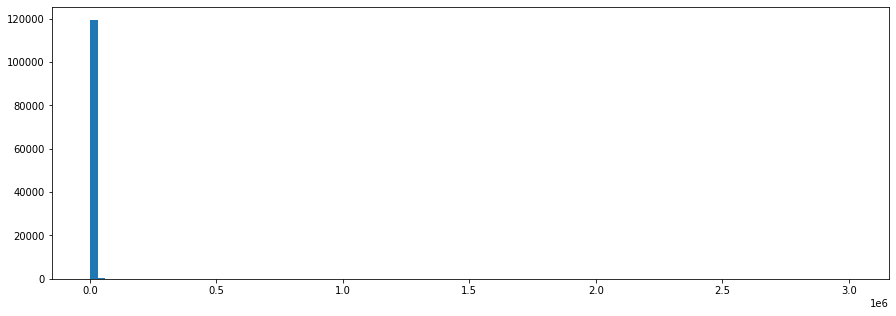

In [4]:
plt.figure(figsize= (15,5))
plt.hist(df.MonthlyIncome, bins=100);

O histograma gerado apresentou quase todos os clientes (120.000) com uma renda próxima de zero. E ao longo do eixo x as barras nem não possíveis de visualizar.
Buscando organizar melhor a visualização as barras usaremos uma escala logaritmica (np.logspace(0, 6.5, 10) os dois primeiros elementos (0 e 6.5) limitam o intervalo desejado com  a potência do logaritmo de 10 no caso 10 elevado na zero que é igual a 1 e 10 elevado na 6.5 que é 3.162.277,66 e o último elemento representa a quantidade de itens no meu conjunto.

In [5]:
#Exemplificando a escala logaritmica:
np.logspace(0, 6.5, 10)

array([1.00000000e+00, 5.27499706e+00, 2.78255940e+01, 1.46779927e+02,
       7.74263683e+02, 4.08423865e+03, 2.15443469e+04, 1.13646367e+05,
       5.99484250e+05, 3.16227766e+06])

In [6]:
#Exemplificando a escala logaritmica:
np.logspace(0, 3, 10)

array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ])

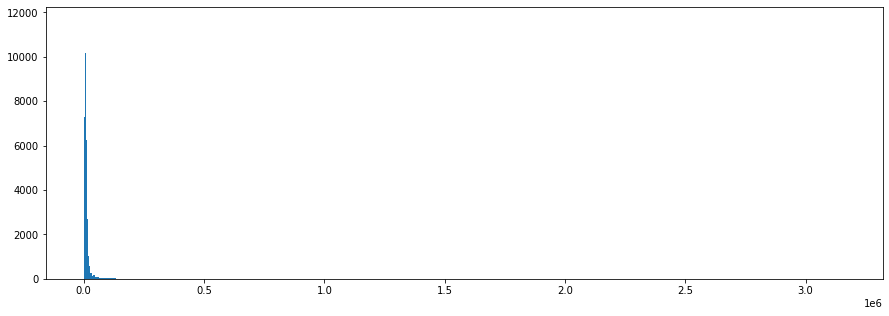

In [7]:
#Voltando ao histograma:
plt.figure(figsize= (15,5))
plt.hist(df.MonthlyIncome, bins=np.logspace(0, 6.5, 100));

Já houve uma melhora na visualização, mas podemos colocar o eixo X na escala logarítimica para melhorar.

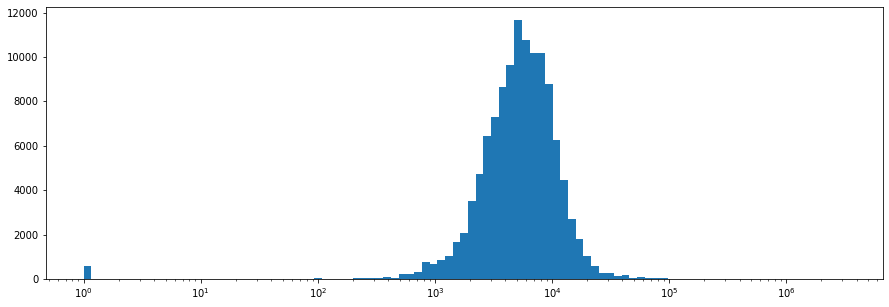

In [8]:
plt.figure(figsize= (15,5))
plt.hist(df.MonthlyIncome, bins=np.logspace(0, 6.5, 100))
plt.xscale('log');

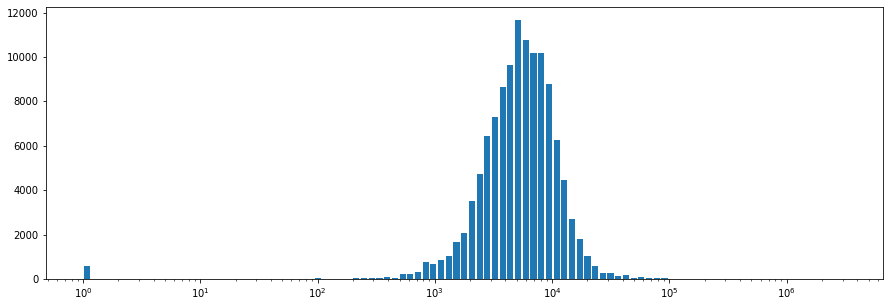

In [9]:
#Usando o rwidth para espaçar as barras.
plt.figure(figsize= (15,5))
plt.hist(df.MonthlyIncome, bins=np.logspace(0, 6.5, 100), rwidth = .8)
plt.xscale('log');

A partir do histograma gerado é possivel verificar que a nossa variável resposta é bastante assimétrica.

In [10]:
df.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,9120.0,13,0,6,0,2.0
1,0.957151,40,0,2600.0,4,0,0,0,1.0
2,0.658180,38,1,3042.0,2,1,0,0,0.0
3,0.233810,30,0,3300.0,5,0,0,0,0.0
4,0.907239,49,1,63588.0,7,0,1,0,0.0


A partir da variável idade vamos contruir um gráfico de dispersão (scatterplot) para verificar a relação com a renda (variável resposta).

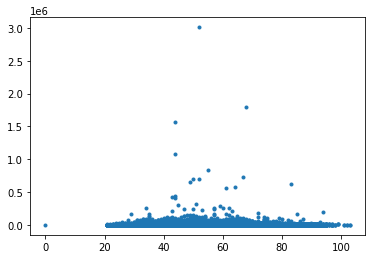

In [13]:
plt.plot(df.age, df.MonthlyIncome, '.');

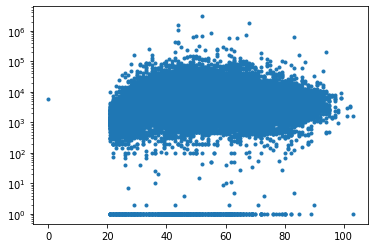

In [12]:
#Modificando a escala para melhorar a visualização.
plt.plot(df.age, df.MonthlyIncome, '.')
plt.yscale('log')

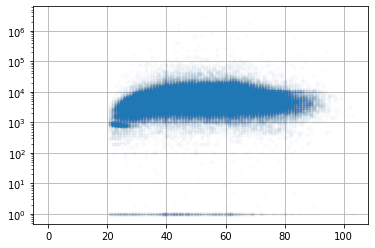

In [14]:
#Usando uma tranparência nos pontos para facilitar a interpretação.
plt.plot(df.age, df.MonthlyIncome, '.', alpha = .01)
plt.yscale('log')
#Adicionando linhas
plt.grid()

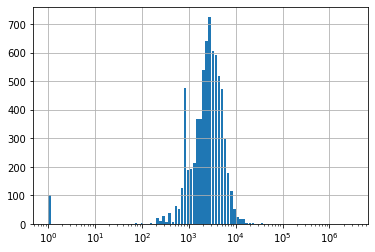

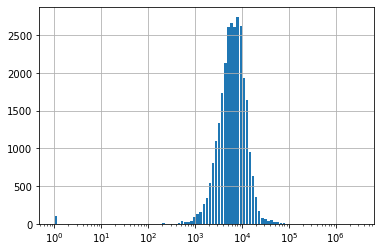

In [18]:
#Repartindo os dados em faixas etárias que se deseja investigar.Na faixa de idade de 20 até 30 anos.
plt.figure()
plt.hist(df.loc[(df.age >= 20) &(df.age < 30)].MonthlyIncome, bins=np.logspace(0, 6.5, 100), rwidth = .8 )
plt.xscale('log')
plt.grid()

plt.figure()
plt.hist(df.loc[(df.age >= 50) &(df.age < 60)].MonthlyIncome, bins=np.logspace(0, 6.5, 100), rwidth = .8 )
plt.xscale('log')
plt.grid()

### Separar em variáveis preditivas e variável resposta.

In [19]:
X = df.drop('MonthlyIncome', axis =1)
y = df.MonthlyIncome

###Separação em treino e teste

In [20]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = .3)

###Treinar o modelo

In [21]:
#Usando o modelo de Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, max_depth = 8, n_jobs = -1 )
rf.fit(X_tr, y_tr)

RandomForestRegressor(max_depth = 8, n_estimators = 500, n_jobs = -1)


RandomForestRegressor(max_depth=8, n_estimators=500, n_jobs=-1)

In [22]:
y_ts

63935      9000.0
17588      5483.0
95717     12886.0
31067      7958.0
15223     10659.0
           ...   
91033      3500.0
5564       6250.0
119210     3200.0
115082     8420.0
27354      5833.0
Name: MonthlyIncome, Length: 36081, dtype: float64

In [23]:
#Vendo as predições. Para o primeiro cliente foi predita uma renda de 8945.19, 
#mas a renda real foi de 9000, o do segundo 8759.29 e a real foi de 5483.
rf.predict(X_ts)

array([8945.19339285, 8759.29302419, 9638.09364746, ..., 4007.04909106,
       7765.93148386, 4618.19515147])

Par verificarmos se o modelo está bom, podemos analisar o erro (Renda real menos as predições do modelo).


In [24]:
erro = y_ts - rf.predict(X_ts)
erro

63935       54.806607
17588    -3276.293024
95717     3247.906353
31067      657.787403
15223     2960.038202
             ...     
91033    -1676.602902
5564     -1418.877240
119210    -807.049091
115082     654.068516
27354     1214.804849
Name: MonthlyIncome, Length: 36081, dtype: float64

Quando o valor é negativo, o modelo errou para menos e quando positivo o modelo errou para mais.

In [25]:
#O erro médio foi.
erro.mean()

33.238303685717

Apesar do modelo apresentar um erro baixo, não é o erro real, pois como os valores ora são positivo e ora negativo a média tende a ser zero. Não podendo avaliar se o modelo é bom ou não e sim podendo avaliar se ele apresenta algum viés para um lado ou outro.

Para avaliar realmente o erro é usado o erro absoluto.
Usando o módulo do valor, sem ser negativo ou positivo.

In [26]:
#Erro absoluto
erro_abs = np.abs(y_ts - rf.predict(X_ts))

In [27]:
erro_abs

63935       54.806607
17588     3276.293024
95717     3247.906353
31067      657.787403
15223     2960.038202
             ...     
91033     1676.602902
5564      1418.877240
119210     807.049091
115082     654.068516
27354     1214.804849
Name: MonthlyIncome, Length: 36081, dtype: float64

In [28]:
#A média do erro absoluto (Erro Absoluto Médio)
erro_abs.mean()

3265.102983503433

In [31]:
#Essa formula já tem pronta na biblioteca Scikitlearn.
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_ts, rf.predict(X_ts))

3265.102983503433

###Criando um histograma para comparar o modelo de predição e os dados reais.

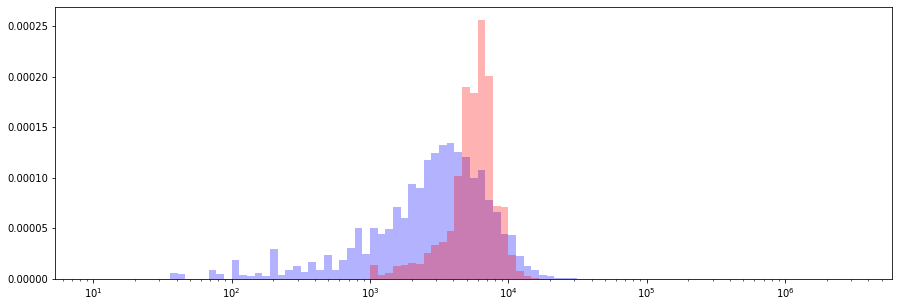

In [33]:
plt.figure(figsize = (15,5))
#Em azul o histograma dos dados reais
plt.hist(y_ts, bins = np.logspace(1, 6.5, 100), color = 'b', alpha = .30, density = True)
#Em vermelho o histograma dos dados preditos pelo modelo.
plt.hist(rf.predict(X_ts), bins = np.logspace(1, 6.5, 100), color ='r', alpha = 0.30 , density = True)

plt.xscale('log')

O modelo está concentrando a renda dos clientes, sendo um indício de que o modelo precisa ser ajustado.